In [40]:
# prompt: using polars, import vega_weights.csv

import polars as pl

# Assuming vega_weights.csv is in the current directory
df = pl.read_csv("vega_weights.csv", separator="\t")

# To display the DataFrame (optional)
df

iteration,tf,gene,wei,cond
i64,str,str,str,str
0,"""ELF1""","""ANGPT2""",null,"""control"""
0,"""IRF1""","""ANGPT2""",null,"""control"""
0,"""IRF3""","""ANGPT2""",null,"""control"""
0,"""IRF5""","""ANGPT2""",null,"""control"""
0,"""IRF7""","""ANGPT2""",null,"""control"""
…,…,…,…,…
19,"""STAT3""","""RASD1""","""-0.0""","""stimulated"""
19,"""STAT4""","""RASD1""","""-0.0""","""stimulated"""
19,"""STAT5A""","""RASD1""","""0.0""","""stimulated"""


In [41]:
df_remove_iter_0_for_nulls_and_cast = df.filter(pl.col("iteration") != 0).with_columns(
    pl.col("wei").cast(pl.Float64),
)
df_remove_iter_0_for_nulls_and_cast

iteration,tf,gene,wei,cond
i64,str,str,f64,str
1,"""ELF1""","""ANGPT2""",0.000908,"""control"""
1,"""IRF1""","""ANGPT2""",-0.0,"""control"""
1,"""IRF3""","""ANGPT2""",0.0,"""control"""
1,"""IRF5""","""ANGPT2""",0.0,"""control"""
1,"""IRF7""","""ANGPT2""",-0.0,"""control"""
…,…,…,…,…
19,"""STAT3""","""RASD1""",-0.0,"""stimulated"""
19,"""STAT4""","""RASD1""",-0.0,"""stimulated"""
19,"""STAT5A""","""RASD1""",0.0,"""stimulated"""


In [53]:
df_remove_iter_0_for_nulls_and_cast.write_csv(
    "vega_weights_cleaned.csv",
    separator="\t",
    include_header=True
)

In [42]:
df_one_tf = df_remove_iter_0_for_nulls_and_cast.filter(pl.col("tf") == "IRF1")
df_one_tf

iteration,tf,gene,wei,cond
i64,str,str,f64,str
1,"""IRF1""","""ANGPT2""",-0.0,"""control"""
1,"""IRF1""","""BLK""",0.0,"""control"""
1,"""IRF1""","""CASP8""",0.001635,"""control"""
1,"""IRF1""","""CAT""",-0.0,"""control"""
1,"""IRF1""","""CD1D""",-0.0,"""control"""
…,…,…,…,…
19,"""IRF1""","""TXNRD3""",0.0,"""stimulated"""
19,"""IRF1""","""AKR1C1""",-0.0,"""stimulated"""
19,"""IRF1""","""HSD17B8""",-0.0,"""stimulated"""


In [43]:
df_one_tf.filter((pl.col("iteration") == 19) & (pl.col("gene") == "TXNRD3"))

iteration,tf,gene,wei,cond
i64,str,str,f64,str
19,"""IRF1""","""TXNRD3""",0.0,"""control"""
19,"""IRF1""","""TXNRD3""",0.0,"""stimulated"""


In [44]:
# prompt: pivot df_one_tf_one_iter wider for cond column, matching entries in gene col

df_pivot = df_one_tf.pivot(index=["iteration","tf","gene"], columns="cond", values="wei")
df_pivot

/tmp/ipykernel_13376/3610453622.py:3: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  df_pivot = df_one_tf.pivot(index=["iteration","tf","gene"], columns="cond", values="wei")


iteration,tf,gene,control,stimulated
i64,str,str,f64,f64
1,"""IRF1""","""ANGPT2""",-0.0,-0.0
1,"""IRF1""","""BLK""",0.0,0.0
1,"""IRF1""","""CASP8""",0.001635,-0.001327
1,"""IRF1""","""CAT""",-0.0,-0.0
1,"""IRF1""","""CD1D""",-0.0,-0.0
…,…,…,…,…
19,"""IRF1""","""TXNRD3""",0.0,0.0
19,"""IRF1""","""AKR1C1""",0.0,-0.0
19,"""IRF1""","""HSD17B8""",0.0,-0.0


In [45]:
df_pivot.describe()

statistic,iteration,tf,gene,control,stimulated
str,f64,str,str,f64,f64
"""count""",13110.0,"""13110""","""13110""",13110.0,13110.0
"""null_count""",0.0,"""0""","""0""",0.0,0.0
"""mean""",10.0,null,null,0.000014,0.000027
"""std""",5.477434,null,null,0.00536,0.006274
"""min""",1.0,"""IRF1""","""AATF""",-0.138944,-0.114085
"""25%""",5.0,null,null,-0.0,-0.0
"""50%""",10.0,null,null,0.0,-0.0
"""75%""",15.0,null,null,-0.0,0.0
"""max""",19.0,"""IRF1""","""ZNF655""",0.14855,0.115716


In [46]:
df_diff_sorted = df_pivot.with_columns((pl.col("stimulated") - pl.col("control")).alias("diff")).sort("diff")
print(df_diff_sorted)

shape: (13_110, 6)
┌───────────┬──────┬──────┬───────────┬────────────┬───────────┐
│ iteration ┆ tf   ┆ gene ┆ control   ┆ stimulated ┆ diff      │
│ ---       ┆ ---  ┆ ---  ┆ ---       ┆ ---        ┆ ---       │
│ i64       ┆ str  ┆ str  ┆ f64       ┆ f64        ┆ f64       │
╞═══════════╪══════╪══════╪═══════════╪════════════╪═══════════╡
│ 19        ┆ IRF1 ┆ CD74 ┆ 0.134814  ┆ -0.113933  ┆ -0.248747 │
│ 13        ┆ IRF1 ┆ CD74 ┆ 0.1394483 ┆ -0.10589   ┆ -0.245338 │
│ 1         ┆ IRF1 ┆ CD74 ┆ 0.126707  ┆ -0.110067  ┆ -0.236774 │
│ 6         ┆ IRF1 ┆ CD74 ┆ 0.135022  ┆ -0.097404  ┆ -0.232426 │
│ 10        ┆ IRF1 ┆ CD74 ┆ 0.1250691 ┆ -0.106137  ┆ -0.231206 │
│ …         ┆ …    ┆ …    ┆ …         ┆ …          ┆ …         │
│ 18        ┆ IRF1 ┆ CD74 ┆ -0.129411 ┆ 0.100579   ┆ 0.22999   │
│ 4         ┆ IRF1 ┆ CD74 ┆ -0.128941 ┆ 0.105707   ┆ 0.234647  │
│ 9         ┆ IRF1 ┆ CD74 ┆ -0.135615 ┆ 0.105742   ┆ 0.241357  │
│ 5         ┆ IRF1 ┆ CD74 ┆ -0.132064 ┆ 0.109769   ┆ 0.241833  │
│ 16  

In [47]:
gene_order = df_diff_sorted.group_by("gene").agg(pl.mean("diff").alias("diff_mean")).sort("diff_mean").drop("diff_mean")
gene_order

gene
str
"""CD74"""
"""MAPK8"""
"""BIRC3"""
"""IL23A"""
"""IGBP1"""
…
"""CCL2"""
"""IDO1"""
"""RSAD2"""


In [48]:
# prompt: merge df_diff_sorted and gene_order, keep the order of gene_order, use polars

# Ensure the gene column is the same type in both dataframes before joining
# Check data types if necessary and cast if needed
# print(df_diff_sorted.dtypes)
# print(gene_order.dtypes)

# Assuming 'gene' is the column to join on in both dataframes
# Use a left join with gene_order on the left to keep its order
df_merged = gene_order.join(df_diff_sorted, on="gene", how="left")

df_merged.describe()


statistic,gene,iteration,tf,control,stimulated,diff
str,str,f64,str,f64,f64,f64
"""count""","""13110""",13110.0,"""13110""",13110.0,13110.0,13110.0
"""null_count""","""0""",0.0,"""0""",0.0,0.0,0.0
"""mean""",null,10.0,null,0.000014,0.000027,0.000012
"""std""",null,5.477434,null,0.00536,0.006274,0.008364
"""min""","""AATF""",1.0,"""IRF1""",-0.138944,-0.114085,-0.248747
"""25%""",null,5.0,null,0.0,-0.0,-0.0
"""50%""",null,10.0,null,-0.0,-0.0,0.0
"""75%""",null,15.0,null,-0.0,0.0,0.0
"""max""","""ZNF655""",19.0,"""IRF1""",0.14855,0.115716,0.249394


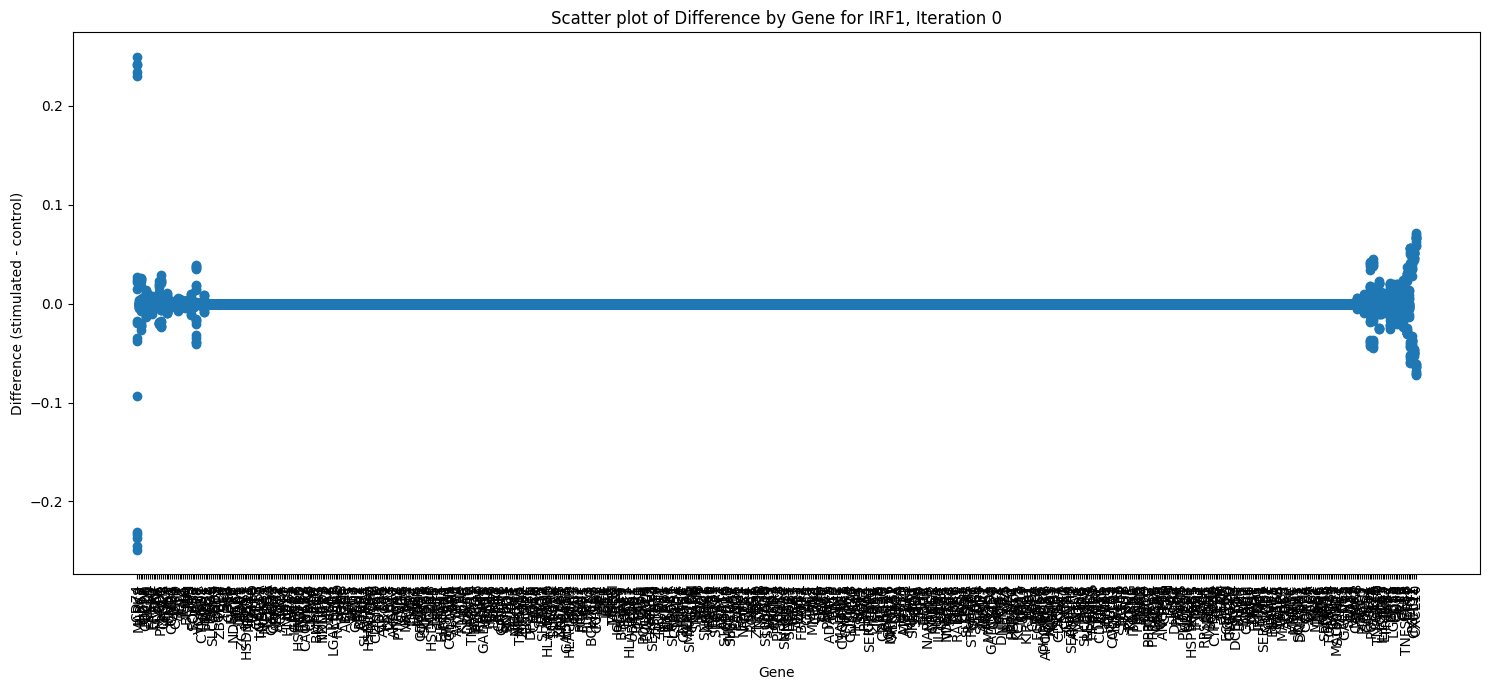

In [51]:
# prompt: Can you create a scatter plot where y is continuous, but x is categorical, y will be column named "diff", x will be "gene", do it for df_diff_sorted, it looks like this: ┌───────────┬──────┬────────┬───────────┬────────────┬───────────┐
# │ iteration ┆ tf   ┆ gene   ┆ control   ┆ stimulated ┆ diff      │
# │ ---       ┆ ---  ┆ ---    ┆ ---       ┆ ---        ┆ ---       │
# │ i64       ┆ str  ┆ str    ┆ f64       ┆ f64        ┆ f64       │
# ╞═══════════╪══════╪════════╪═══════════╪════════════╪═══════════╡
# │ 0         ┆ IRF1 ┆ CD74   ┆ 0.126597  ┆ -0.111467  ┆ -0.238063 │
# │ 0         ┆ IRF1 ┆ CXCL10 ┆ 0.000985  ┆ -0.065949  ┆ -0.066935 │
# │ 0         ┆ IRF1 ┆ IDO1   ┆ 0.008855  ┆ -0.049404  ┆ -0.058259 │
# │ 0         ┆ IRF1 ┆ LYZ    ┆ 0.021448  ┆ -0.032945  ┆ -0.054393 │
# │ 0         ┆ IRF1 ┆ CXCL11 ┆ 0.000234  ┆ -0.050447  ┆ -0.050681 │
# │ …         ┆ …    ┆ …      ┆ …         ┆ …          ┆ …         │
# │ 0         ┆ IRF1 ┆ IGBP1  ┆ -0.003481 ┆ 0.00168    ┆ 0.005161  │
# │ 0         ┆ IRF1 ┆ FASLG  ┆ -0.004771 ┆ 0.001587   ┆ 0.006359  │
# │ 0         ┆ IRF1 ┆ CCL2   ┆ -0.008985 ┆ -0.001716  ┆ 0.007269  │
# │ 0         ┆ IRF1 ┆ LCK    ┆ -0.009362 ┆ 0.010889   ┆ 0.020251  │
# │ 0         ┆ IRF1 ┆ SELL   ┆ -0.008002 ┆ 0.029733   ┆ 0.037735  │
# └───────────┴──────┴────────┴───────────┴────────────┴───────────┘

import matplotlib.pyplot as plt
import pandas as pd

# Convert Polars DataFrame to Pandas DataFrame for plotting with Matplotlib
df_std_away_pd = df_merged.to_pandas()

# Create the scatter plot
plt.figure(figsize=(15, 7)) # Adjust figure size as needed
plt.scatter(df_std_away_pd['gene'], df_std_away_pd['diff'])

plt.xlabel('Gene')
plt.ylabel('Difference (stimulated - control)')
plt.title('Scatter plot of Difference by Gene for IRF1, Iteration 0')
plt.xticks(rotation=90) # Rotate x-axis labels if they overlap
plt.tight_layout() # Adjust layout to prevent labels from being cut off

plt.show()


In [ ]:
# ...existing code...

import matplotlib.pyplot as plt
import pandas as pd

# Convert Polars DataFrame to Pandas DataFrame for plotting with Matplotlib
df_diff_sorted_pd = df_diff_sorted.to_pandas()

# Create the boxplot
plt.figure(figsize=(15, 7))  # Adjust figure size as needed

# Create a boxplot for 'diff' grouped by 'gene'
df_diff_sorted_pd.boxplot(column='diff', by='gene', grid=False, rot=90)

plt.xlabel('Gene')
plt.ylabel('Difference (stimulated - control)')
plt.title('Boxplot of Difference by Gene for IRF1')
plt.suptitle('')  # Remove the automatic 'Boxplot grouped by gene' title
plt.tight_layout()  # Adjust layout to prevent labels from being cut off

plt.show()
# ...existing code...

In [50]:
# prompt: Can you create a scatter plot where y is continuous, but x is categorical, y will be column named "diff", x will be "gene", do it for df_diff_sorted, it looks like this: ┌───────────┬──────┬────────┬───────────┬────────────┬───────────┐
# │ iteration ┆ tf   ┆ gene   ┆ control   ┆ stimulated ┆ diff      │
# │ ---       ┆ ---  ┆ ---    ┆ ---       ┆ ---        ┆ ---       │
# │ i64       ┆ str  ┆ str    ┆ f64       ┆ f64        ┆ f64       │
# ╞═══════════╪══════╪════════╪═══════════╪════════════╪═══════════╡
# │ 0         ┆ IRF1 ┆ CD74   ┆ 0.126597  ┆ -0.111467  ┆ -0.238063 │
# │ 0         ┆ IRF1 ┆ CXCL10 ┆ 0.000985  ┆ -0.065949  ┆ -0.066935 │
# │ 0         ┆ IRF1 ┆ IDO1   ┆ 0.008855  ┆ -0.049404  ┆ -0.058259 │
# │ 0         ┆ IRF1 ┆ LYZ    ┆ 0.021448  ┆ -0.032945  ┆ -0.054393 │
# │ 0         ┆ IRF1 ┆ CXCL11 ┆ 0.000234  ┆ -0.050447  ┆ -0.050681 │
# │ …         ┆ …    ┆ …      ┆ …         ┆ …          ┆ …         │
# │ 0         ┆ IRF1 ┆ IGBP1  ┆ -0.003481 ┆ 0.00168    ┆ 0.005161  │
# │ 0         ┆ IRF1 ┆ FASLG  ┆ -0.004771 ┆ 0.001587   ┆ 0.006359  │
# │ 0         ┆ IRF1 ┆ CCL2   ┆ -0.008985 ┆ -0.001716  ┆ 0.007269  │
# │ 0         ┆ IRF1 ┆ LCK    ┆ -0.009362 ┆ 0.010889   ┆ 0.020251  │
# │ 0         ┆ IRF1 ┆ SELL   ┆ -0.008002 ┆ 0.029733   ┆ 0.037735  │
# └───────────┴──────┴────────┴───────────┴────────────┴───────────┘

import matplotlib.pyplot as plt
import pandas as pd

# Convert Polars DataFrame to Pandas DataFrame for plotting with Matplotlib
df_std_away_pd = df_std_away.to_pandas()

# Create the scatter plot
plt.figure(figsize=(15, 7)) # Adjust figure size as needed
plt.scatter(df_std_away_pd['gene'], df_std_away_pd['diff'])

plt.xlabel('Gene')
plt.ylabel('Difference (stimulated - control)')
plt.title('Scatter plot of Difference by Gene for IRF1, Iteration 0')
plt.xticks(rotation=90) # Rotate x-axis labels if they overlap
plt.tight_layout() # Adjust layout to prevent labels from being cut off

plt.show()


NameError: name 'df_std_away' is not defined

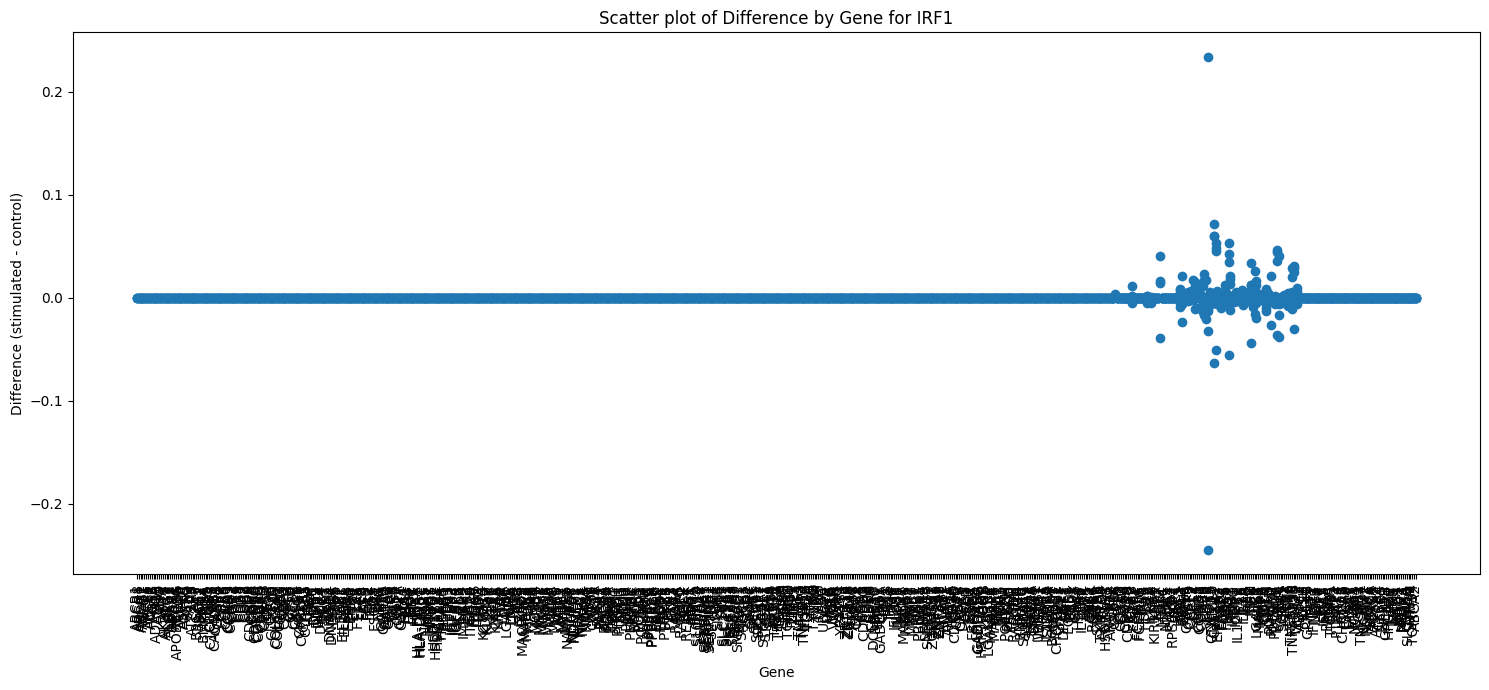

In [ ]:
# prompt: Can you create a scatter plot where y is continuous, but x is categorical, y will be column named "diff", x will be "gene", do it for df_diff_sorted, it looks like this: shape: (1_983, 6)
# ┌───────────┬──────┬─────────┬───────────┬────────────┬───────────┐
# │ iteration ┆ tf   ┆ gene    ┆ control   ┆ stimulated ┆ diff      │
# │ ---       ┆ ---  ┆ ---     ┆ ---       ┆ ---        ┆ ---       │
# │ i64       ┆ str  ┆ str     ┆ f64       ┆ f64        ┆ f64       │
# ╞═══════════╪══════╪═════════╪═══════════╪════════════╪═══════════╡
# │ 0         ┆ IRF1 ┆ BBC3    ┆ 0.000439  ┆ -0.000998  ┆ -0.001438 │
# │ 0         ┆ IRF1 ┆ BCL2    ┆ 0.003184  ┆ -0.003618  ┆ -0.006802 │
# │ 0         ┆ IRF1 ┆ BIRC3   ┆ 0.012095  ┆ -0.009818  ┆ -0.021913 │
# │ 0         ┆ IRF1 ┆ BLMH    ┆ 0.001264  ┆ -0.000106  ┆ -0.00137  │
# │ 0         ┆ IRF1 ┆ C1R     ┆ -0.000056 ┆ -0.000083  ┆ -0.000027 │
# │ …         ┆ …    ┆ …       ┆ …         ┆ …          ┆ …         │
# │ 2         ┆ IRF1 ┆ TXNRD3  ┆ -0.0      ┆ 0.0        ┆ 0.0       │
# │ 2         ┆ IRF1 ┆ AKR1C1  ┆ 0.0       ┆ 0.0        ┆ 0.0       │
# │ 2         ┆ IRF1 ┆ HSD17B8 ┆ -0.0      ┆ -0.0       ┆ 0.0       │
# │ 2         ┆ IRF1 ┆ PPIG    ┆ -0.0      ┆ -0.0       ┆ 0.0       │
# │ 2         ┆ IRF1 ┆ RASD1   ┆ 0.0       ┆ -0.0       ┆ -0.0      │
# └───────────┴──────┴─────────┴───────────┴────────────┴───────────┘

# Convert Polars DataFrame to Pandas DataFrame for plotting with Matplotlib
df_diff_sorted_pd = df_diff_sorted.to_pandas()

# Create the scatter plot
plt.figure(figsize=(15, 7)) # Adjust figure size as needed
plt.scatter(df_diff_sorted_pd['gene'], df_diff_sorted_pd['diff'])

plt.xlabel('Gene')
plt.ylabel('Difference (stimulated - control)')
plt.title('Scatter plot of Difference by Gene for IRF1')
plt.xticks(rotation=90) # Rotate x-axis labels if they overlap
plt.tight_layout() # Adjust layout to prevent labels from being cut off

plt.show()

In [ ]:
# prompt: df_diff_sorted = df_pivot.with_columns((pl.col("stimulated") - pl.col("control")).alias("diff"))
# after this, group by col "gene", and take mean of col "diff"

df_mean_diff = df_diff_sorted.group_by("gene").agg(pl.mean("diff").alias("diff_mean"),
                                                   pl.std("diff").alias("diff_std"))
#df_mean_diff
#df_mean_diff.sort("diff").select(pl.col("diff").abs()) > 0.01)
df_mean_diff.sort("diff_mean").filter(pl.col("diff_mean").abs() > pl.col("diff_mean").mean())

gene,diff_mean,diff_std
str,f64,f64
"""CD74""",-0.014154,0.195722
"""ODC1""",-0.005221,0.009467
"""SELL""",-0.005191,0.032987
"""POLR2K""",-0.003707,0.003885
"""CD200""",-0.003623,0.010717
…,…,…
"""TNFSF13B""",0.013551,0.029132
"""IDO1""",0.018801,0.050073
"""RSAD2""",0.022572,0.039403


In [ ]:
df_std_away = df_diff_sorted.filter(pl.col("diff").abs() > 0.01)
df_std_away

iteration,tf,gene,control,stimulated,diff
i64,str,str,f64,f64,f64
1,"""IRF1""","""CD74""",0.129911,-0.114687,-0.244599
1,"""IRF1""","""CXCL10""",-0.001569,-0.065257,-0.063688
1,"""IRF1""","""IDO1""",0.007792,-0.047702,-0.055494
1,"""IRF1""","""CXCL11""",0.000152,-0.050833,-0.050986
1,"""IRF1""","""IRF8""",0.0127,-0.030762,-0.043462
…,…,…,…,…,…
0,"""IRF1""","""IDO1""",-0.004871,0.048229,0.0531
2,"""IRF1""","""CXCL10""",-0.003012,0.056927,0.059938
0,"""IRF1""","""CXCL10""",0.002847,0.063296,0.060449


In [ ]:
df_diff_sorted1 = df_diff_sorted.filter(pl.col("diff").abs() > pl.col("diff").mean()).group_by("gene").count().sort(by="count")
df_diff_sorted1

<ipython-input-107-93817c777b2b>:1: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  df_diff_sorted1 = df_diff_sorted.filter(pl.col("diff").abs() > pl.col("diff").mean()).group_by("gene").count().sort(by="count")


gene,count
str,u32
"""MKI67""",2
"""PDGFD""",2
"""IL6""",2
"""FOXP3""",2
"""CASP9""",2
…,…
"""HSPA4""",4
"""IL18""",4
"""PMAIP1""",4


In [ ]:
df_diff_sorted2 = df_diff_sorted.group_by("gene").agg(pl.col("diff").mean().alias("diff_mean")).filter(pl.col("diff_mean").abs() > pl.col("diff_mean").mean())
df_diff_sorted2

gene,diff_mean
str,f64
"""SOCS1""",-0.003211
"""JUN""",-0.002754
"""CXCL11""",0.023702
"""SELL""",-0.005191
"""IRF2""",0.001831
…,…
"""IL1B""",0.003308
"""CAMK4""",0.000606
"""CCNB1""",0.000635
